<a href="https://colab.research.google.com/github/Krishnaprasadkvvs/Python/blob/main/Bengaluru_House_Price_Estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
#Importing other necessary libraries.

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (22,12)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


In [ ]:
# Loading the dataset and stofing it into the dataframe df.
df = pd.read_csv("Bengaluru_House_Data.csv")
pd.options.display.max_columns = 30

# Exploratory Data Analysis and Cleaning the Data.

In [ ]:
# Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# Quick data description.
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
# Looking at number of null values.
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
# Checking the head of the dataframe.
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
#Initial Shape of the DataFrame.
df.shape

(13320, 9)

In [ ]:
# Displaying the column names for the dataframe.
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
# Dropping non-essential columns from the dataframe and storing it in df1.
df1=df.drop(['society','availability','area_type','balcony'],axis = 'columns')
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
# Checking Null values in the existing data in the dataframe.
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
# Since only very few NA values we are dropping those values from our data.
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
# Checking shape after dropping nulls.
df2.shape

(13246, 5)

In [ ]:
# Checking Unique values in the size Column.
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
# Creating a new column 'BHK' by extracting essential information about BHK in the 'size' column.
df2['BHK']=df2['size'].apply(lambda x : int(x.split()[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Head of the new dataframe.
df2.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
# Checking the unique values in the 'BHK' column.
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df2[df2.BHK>10]

,location,size,total_sqft,bath,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [ ]:
df2.total_sqft.unique()
# The array of unique values in the total_sqft column.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
len(df2.total_sqft.unique())
# Number of unique values in the total_sqft column.

2067

In [ ]:
# Functon for identifying proper float values and tacking with improper float values.
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
#Tackling those values that aren't a proper float type number i.e uncleaned data with values as range or different unit
#data, misentered data etc.
#Unstructured incoming data.

df2[~df2['total_sqft'].apply(is_float)].head(10)

# We see many range values in the output, so we have to replace these range values with their average in order to make them proper
#float type and also usable.

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
#Function that takes range value and returns the average of the range. This will be used in the total square_feet column in order
#Convert the range of square feets in the the average of the two.

def convert_sqft_to_num(x):
    tokens = x.split('-')   #Splitting on '-' character
    if len(tokens)==2: 
        return (float((float(tokens[0])+float(tokens[1]))/2))
    try:
        return float(x)
    except:
        return None

In [ ]:
# Testing the Function - 1
convert_sqft_to_num('1156 - 2278') # We give range as an Input and get float as an output.

1717.0

In [ ]:
# Testing the Function - 2
convert_sqft_to_num('1015 - 1510')

1262.5

In [ ]:
#applying the function to the copy of the above dataframe denoted by df3. And then displayong it's head.
df3=df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
#Observing a few entries inside the dataframe and displaying it as a sub-dataframe
# The 30th, 78th and 122nd examples are displayed.

df3.loc[[30, 78, 122]]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.0,4
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2
122,Hebbal,4 BHK,5611.5,4.0,477.0,4


# Feature Engineering Begins

In [ ]:
df3.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
#Price per squarefoot is a very important feature in real estate business. We have to remove outliers based on invalid Price per
#Square foot data. The Prices are in lakhs so multiplying by 100000.
df4=df3.copy()
df4['Price_Per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head(5)

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Dealing with Dimensionality Curse

In [ ]:
#Dimensionality Curse
len(df4.location.unique()) # Unique values of Location

1304

In [ ]:
df4.location = df4.location.apply(lambda x : x.strip()) #Strips external spaces in the location data
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats
# We display in ascending order and find there are many locations in the very end having only single entries. We need to combine.
# them under one location name and deal with sparse data and reduce complexity.

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [ ]:
#Any Location which has less than 10 houses call it other location.
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10
#1052 locations have less than 10 houses among 1293 entries in location. This is a huge amount and needs to be death with to
# increase efficiency of our model.

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [ ]:
#Current Number of Unique entries
a = len(df4.location.unique())
print(a)

1293


In [ ]:
#Unique entries after replacing the locations having less than 10 entries as Other Location
df4.location = df4.location.apply(lambda x : 'Other Location' if x in location_stats_less_than_10 else x)
b = len(df4.location.unique())
print(b)

242


In [ ]:
# Number of locations combined under 'Other Location' Column
print(a - b)
# 1051 is a big number considering the total number 1293. These 1051 locations had only single entry values and had to be combined.

1051


In [ ]:
 df4.head(10)

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other Location,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier Reduction and Removal
Domain Knowledge = Typical square_foot per bedroom = 300(minimum) : will help in removal of outliers and unusual datapoints.

In [ ]:
# Checking what all entries have less rhan 300 sqft per bedroom. 300 is our base limit.
df4[df4.total_sqft/df4.BHK < 300].head()

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
9,Other Location,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other Location,3 Bedroom,500.0,3.0,100.0,3,20000.000000


These are erroneous data -
Eg 1. 1000sqft home with 6 bedrooms, 600sqft with 8 bedrooms, very unusual data. So needs to be removed.
Eg 2. 1407sqft home with 6 bedrooms, 500sqft with 3 bedrooms, very unusual data. So needs to be removed.

In [ ]:
#Current Shape of our data frame.
df4.shape

(13246, 7)

In [ ]:
#Creating a new dataframe df5 and removing all the unual data points which give erroneous data for sqft per bedroom.
df5 = df4[~(df4.total_sqft/df4.BHK < 300)]
df5.shape
#Shape after removal of certain erroneous datapoints.

(12502, 7)

In [ ]:
#Total number of unusual datapoints removed
df4.shape[0] - df5.shape[0]

744

In [ ]:
#Detecting anomalies based on price per squarefoot
df5.Price_Per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_Per_sqft, dtype: float64

In [ ]:
describe_df = df5.groupby('location').describe()
describe_df

total_sqft                                    \
                               count         mean          std     min   
location                                                                 
1st Block Jayanagar             10.0  1915.000000   667.549416  1000.0   
1st Phase JP Nagar              23.0  1800.695652   800.365169   840.0   
2nd Phase Judicial Layout       11.0  1173.272727   341.193227   525.0   
2nd Stage Nagarbhavi             9.0  2127.777778  1013.382674  1200.0   
5th Block Hbr Layout             7.0  2112.571429  1589.967175  1100.0   
...                              ...          ...          ...     ...   
Yelachenahalli                  17.0  1321.294118   375.409903   800.0   
Yelahanka                      205.0  1776.041463  2976.915456   567.0   
Yelahanka New Town              38.0  1215.526316   762.328252   350.0   
Yelenahalli                     13.0  1268.461538   190.068240  1056.0   
Yeshwanthpur                    80.0  1454.343750   616.906316   400.0   

                                                               bath            \
                               25%     50%      75%      max  count      mean   
location                                                                        
1st Block Jayanagar        1333.75  1817.5  2437.50   2850.0   10.0  3.100000   
1st Phase JP Nagar         1202.50  1590.0  2071.00   4550.0   24.0  2.958333   
2nd Phase Judicial Layout  1025.00  1300.0  1350.00   1681.0   11.0  2.090909   
2nd Stage Nagarbhavi       1350.00  1500.0  3000.00   4000.0    9.0  4.666667   
5th Block Hbr Layout       1203.00  1270.0  2456.00   5100.0    7.0  3.142857   
...                            ...     ...      ...      ...    ...       ...   
Yelachenahalli             1100.00  1200.0  1400.00   2400.0   17.0  2.058824   
Yelahanka                  1104.00  1327.0  1650.00  35000.0  205.0  2.458537   
Yelahanka New Town          650.00  1050.0  1584.50   4000.0   39.0  1.871795   
Yelenahalli                1160.00  1200.0  1260.00   1650.0   13.0  2.153846   
Yeshwanthpur               1161.75  1381.5  1825.25   3600.0   80.0  2.400000   

                                                           ...       BHK  \
                                std  min   25%  50%   75%  ...      mean   
location                                                   ...             
1st Block Jayanagar        0.875595  2.0  2.25  3.0  4.00  ...  3.200000   
1st Phase JP Nagar         1.334465  1.0  2.00  3.0  3.25  ...  2.875000   
2nd Phase Judicial Layout  0.539360  1.0  2.00  2.0  2.00  ...  2.454545   
2nd Stage Nagarbhavi       1.936492  3.0  4.00  4.0  4.00  ...  4.555556   
5th Block Hbr Layout       1.463850  2.0  2.00  2.0  4.50  ...  3.428571   
...                             ...  ...   ...  ...   ...  ...       ...   
Yelachenahalli             0.555719  1.0  2.00  2.0  2.00  ...  2.411765   
Yelahanka                  1.011933  1.0  2.00  2.0  3.00  ...  2.512195   
Yelahanka New Town         0.731958  1.0  1.00  2.0  2.00  ...  2.076923   
Yelenahalli                0.375534  2.0  2.00  2.0  2.00  ...  2.230769   
Yeshwanthpur               0.962591  1.0  2.00  2.0  3.00  ...  2.437500   

                                                             Price_Per_sqft  \
                                std  min  25%  50%  75%  max          count   
location                                                                      
1st Block Jayanagar        0.788811  2.0  3.0  3.0  4.0  4.0           10.0   
1st Phase JP Nagar         1.115601  1.0  2.0  3.0  4.0  5.0           23.0   
2nd Phase Judicial Layout  0.687552  1.0  2.0  3.0  3.0  3.0           11.0   
2nd Stage Nagarbhavi       0.881917  4.0  4.0  4.0  5.0  6.0            9.0   
5th Block Hbr Layout       1.618347  2.0  2.0  3.0  4.5  6.0            7.0   
...                             ...  ...  ...  ...  ...  ...            ...   
Yelachenahalli             0.618347  2.0  2.0  2.0  3.0  4.0           17.0   

Text(0, 0.5, 'Count')

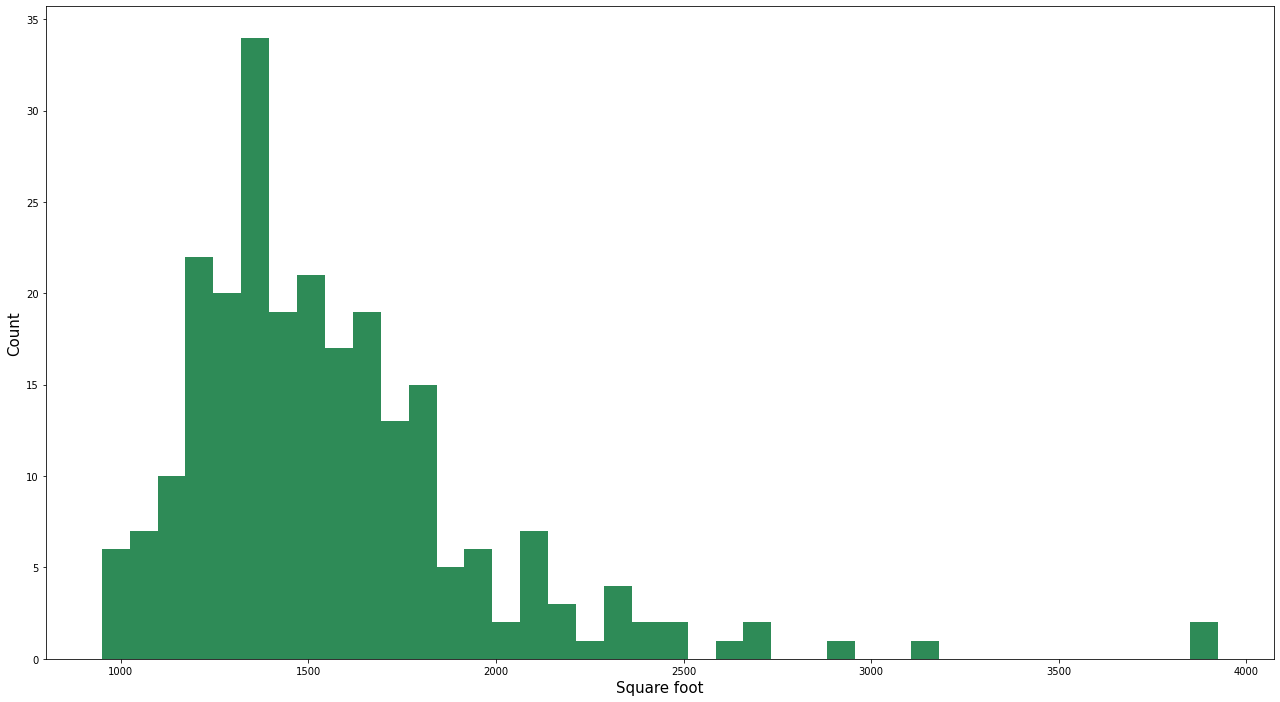

In [ ]:
# Distribution of mean value of Total Sqft grouped by location.
plt.hist(describe_df['total_sqft']['mean'],bins = 40, color = 'seagreen' )
plt.xlabel('Square foot', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Maximum flats are in the range of 1200 - 1400 sqft

Text(0, 0.5, 'Count')

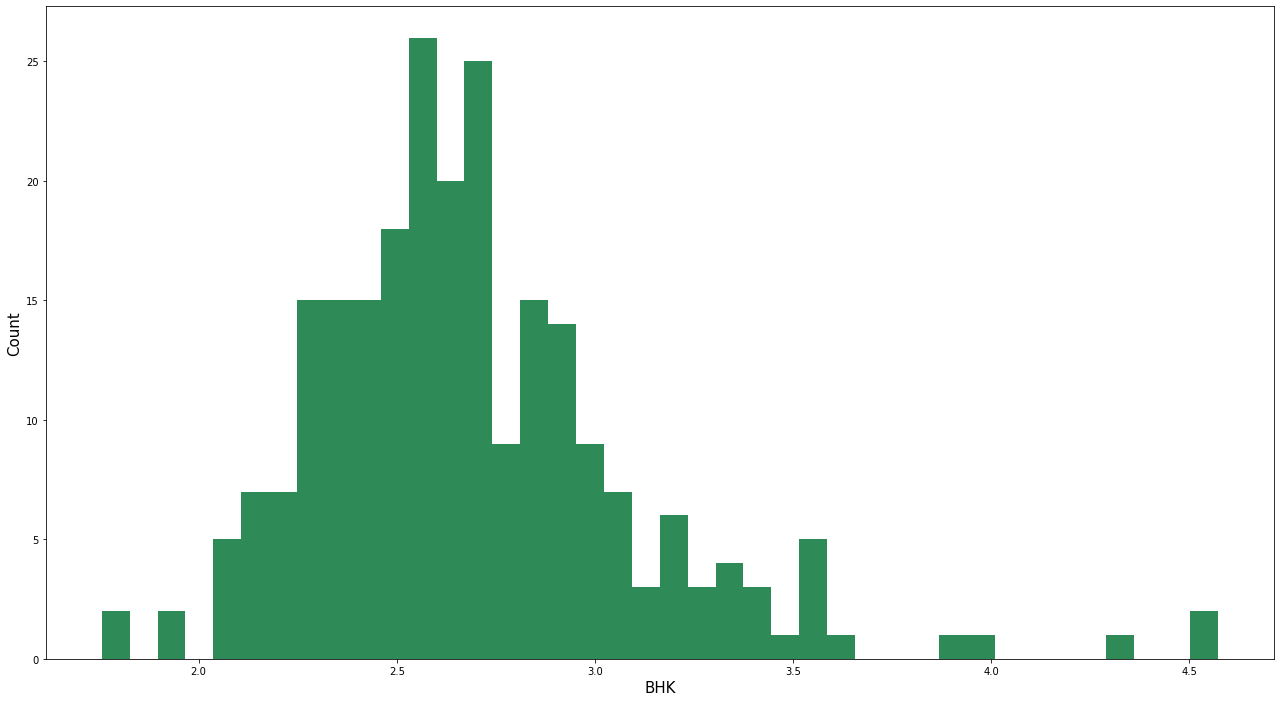

In [ ]:
# Distribution of mean value of BHK grouped by location.
plt.hist(describe_df['BHK']['mean'],bins = 40, color = 'seagreen' )
plt.xlabel('BHK', size = 15)
plt.ylabel('Count', size = 15)
# Observation - 2 to 3 BHK flats dominate the distribution.

Text(0, 0.5, 'Count')

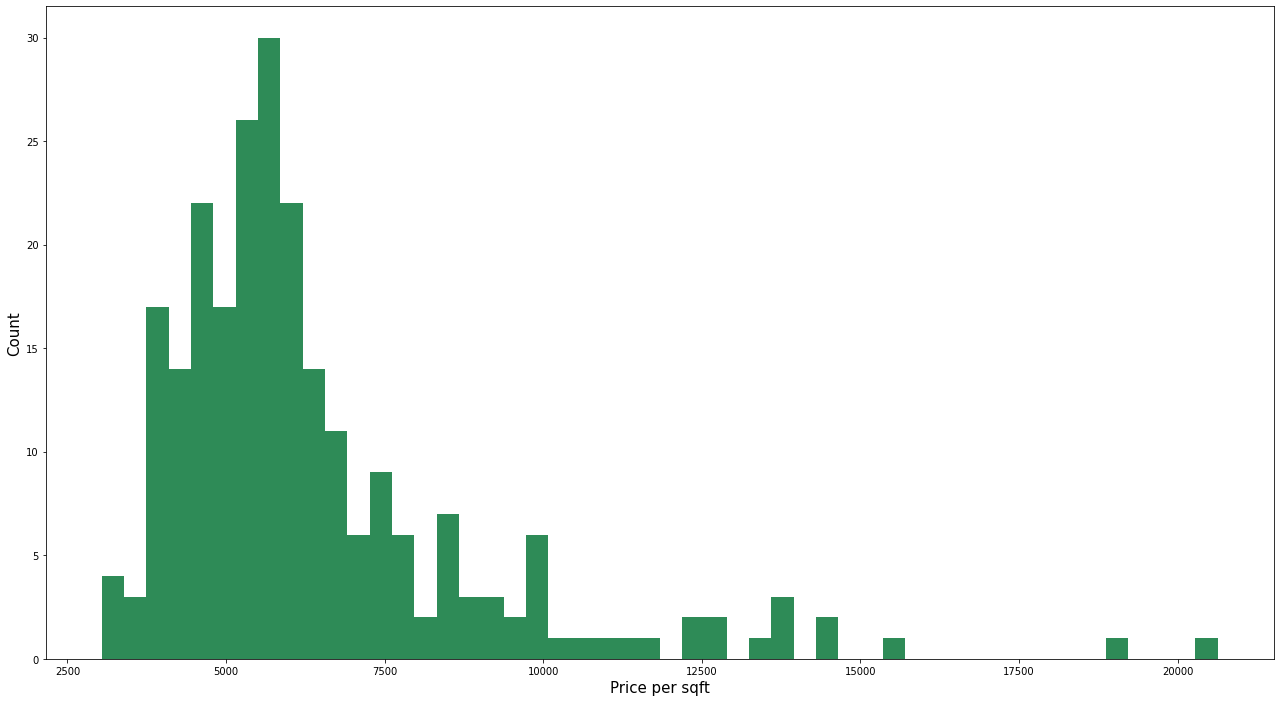

In [ ]:
# Distribution of mean value of Price Per sqft grouped by location.
plt.hist(describe_df['Price_Per_sqft']['mean'],bins = 50, color = 'seagreen' )
plt.xlabel('Price per sqft', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Average Price per square foot is in the range of Rs. 5000 to Rs. 6000.

Text(0, 0.5, 'Count')

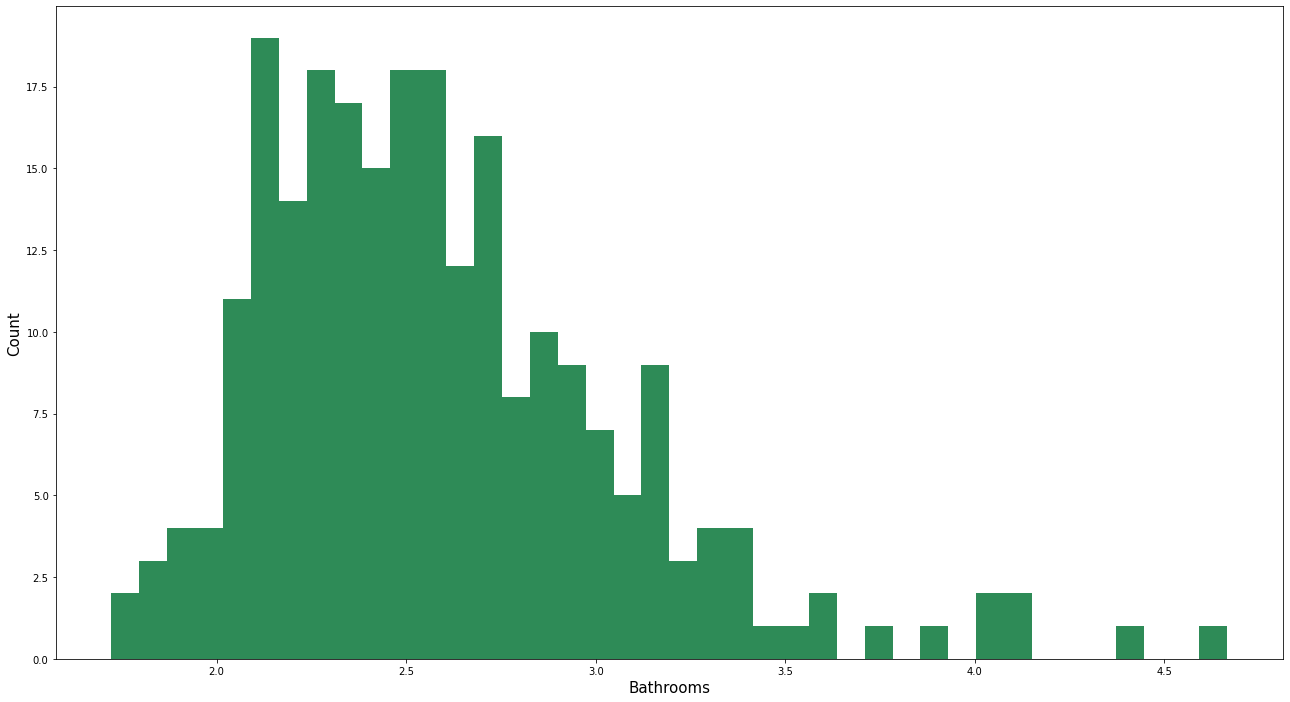

In [ ]:
# Distribution of mean value of baths grouped by location.
plt.hist(describe_df['bath']['mean'],bins = 40, color = 'seagreen' )
plt.xlabel('Bathrooms', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Maximum households have 2 to 3 bathrooms.

In [ ]:
#Keeping only those data that lies within the Mean and one Standard Deviation on either side.
# These outliers has to be removed.
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.Price_Per_sqft)
        sd=np.std(subdf.Price_Per_sqft)
        reduced_df = subdf[(subdf.Price_Per_sqft>(m-sd)) & (subdf.Price_Per_sqft<=(m+sd))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out
df6 = remove_pps_outlier(df5)
df6.shape #Displaying the Shape

(10241, 7)

In [ ]:
#Outlier data removed, removing data beyond one standard deviation.
df5.shape[0] - df6.shape[0]

2261

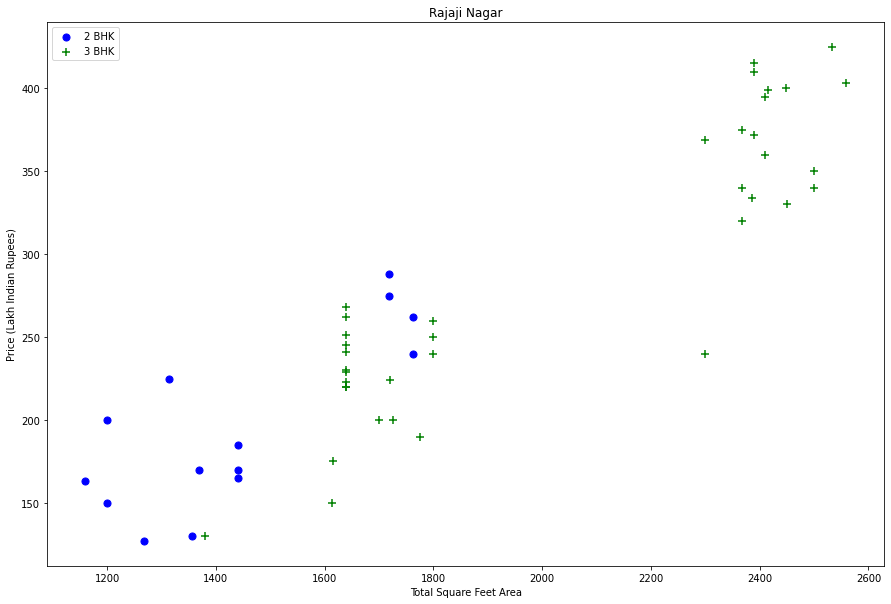

In [ ]:
#Certain Data Points have same sqft 3BHK flats priced less than 2BHK flats. These are outliers and have to be removed.
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]  #Finding 2BHK flats
    bhk3 = df[(df.location==location) & (df.BHK==3)]  #Finding 3BHK flats
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar") #Plotting the scatterplot for Rajaji Nagar

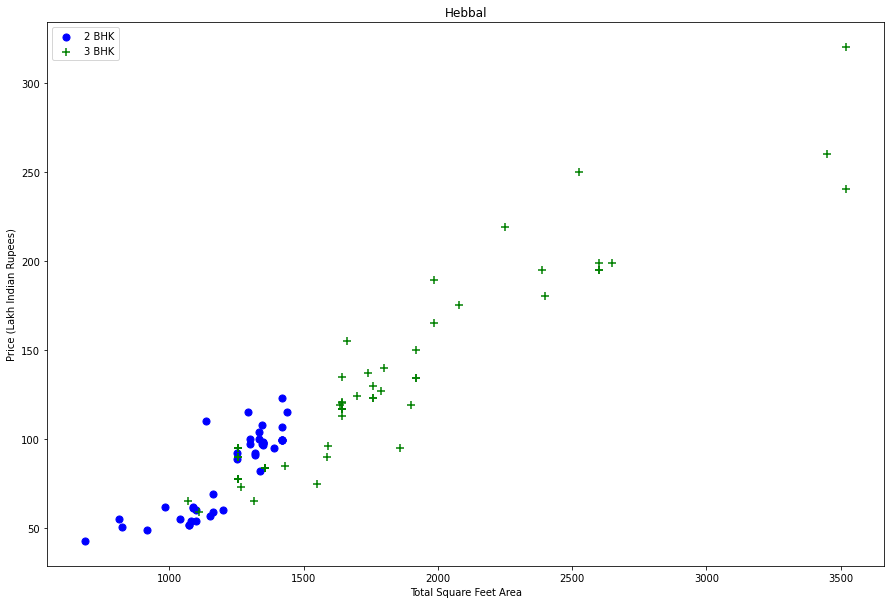

In [ ]:
#Plotting the same for Hebbal
plot_scatter_chart(df6,"Hebbal")

#2BHK flat should have price lesser than 3BHK of same sqft.
#Filtering out all those values of say 2BHK whose price per squarefoot is less than 1BHK.

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_Per_sqft),
                'std': np.std(bhk_df.Price_Per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_Per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
#df8 = df7.copy()
df7.shape

(7329, 7)

In [ ]:
#Total number of anomalies removes
df6.shape[0] - df7.shape[0]

2912

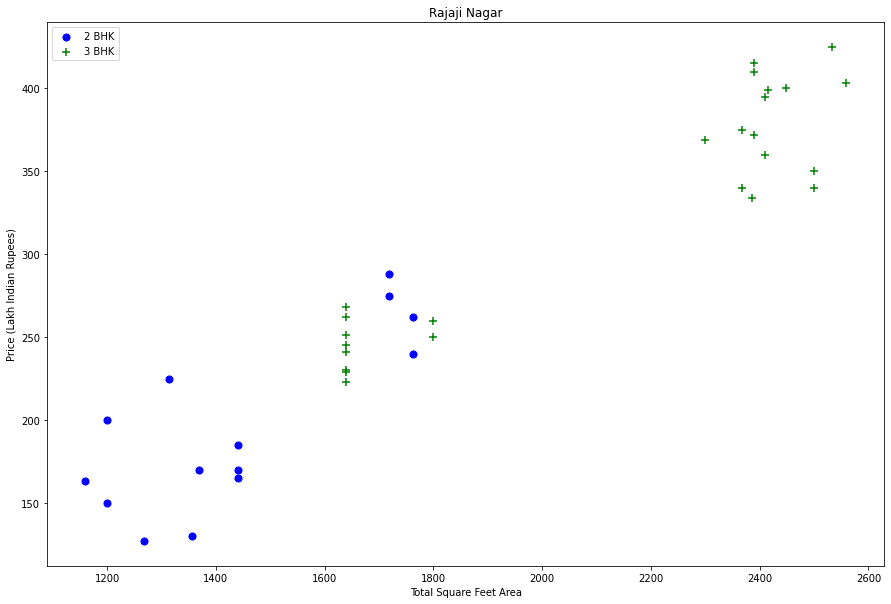

In [ ]:
plot_scatter_chart(df7,"Rajaji Nagar") #Plotting the scatterplot for Rajaji Nagar

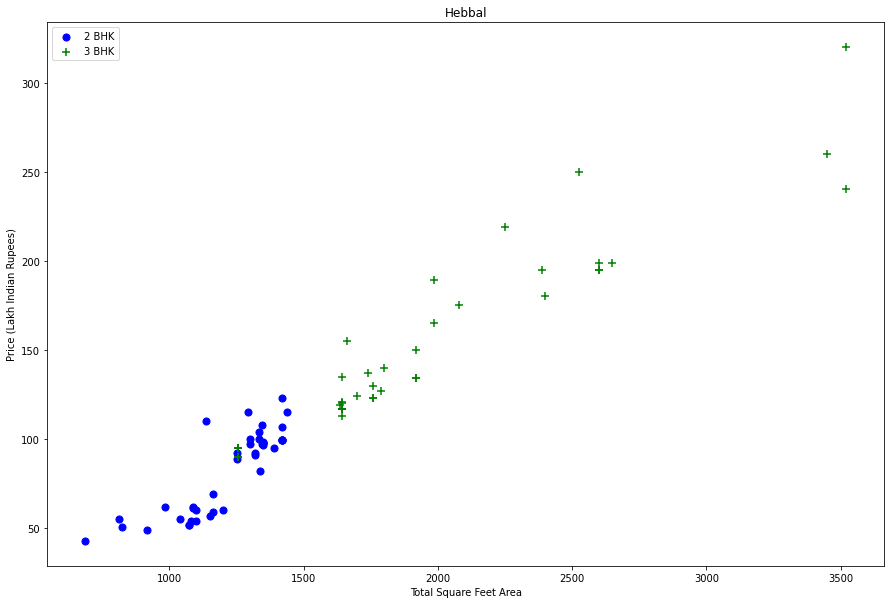

In [ ]:
#Plotting the same for Hebbal
plot_scatter_chart(df7,"Hebbal")

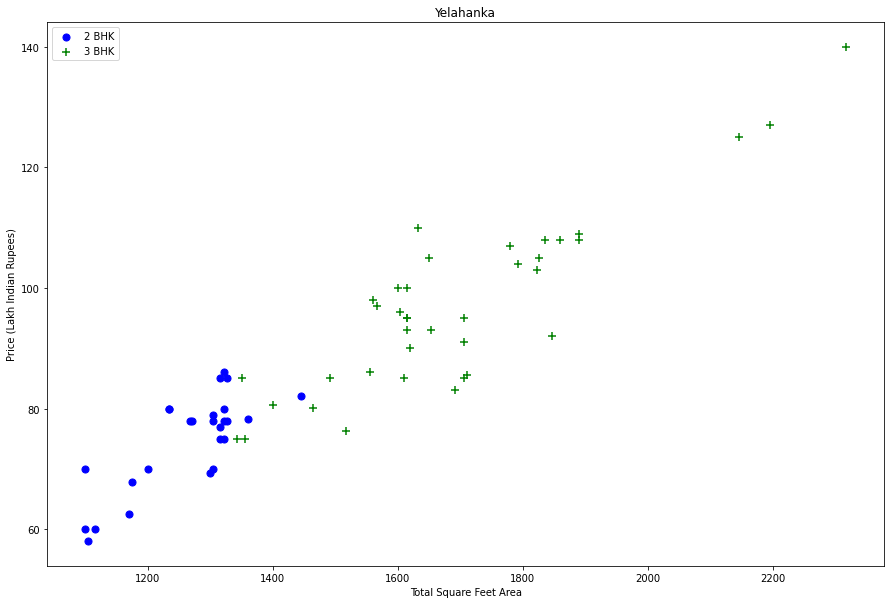

In [ ]:
#Plotting the same for Yelahanka
plot_scatter_chart(df7,"Yelahanka")

Text(0, 0.5, 'Count')

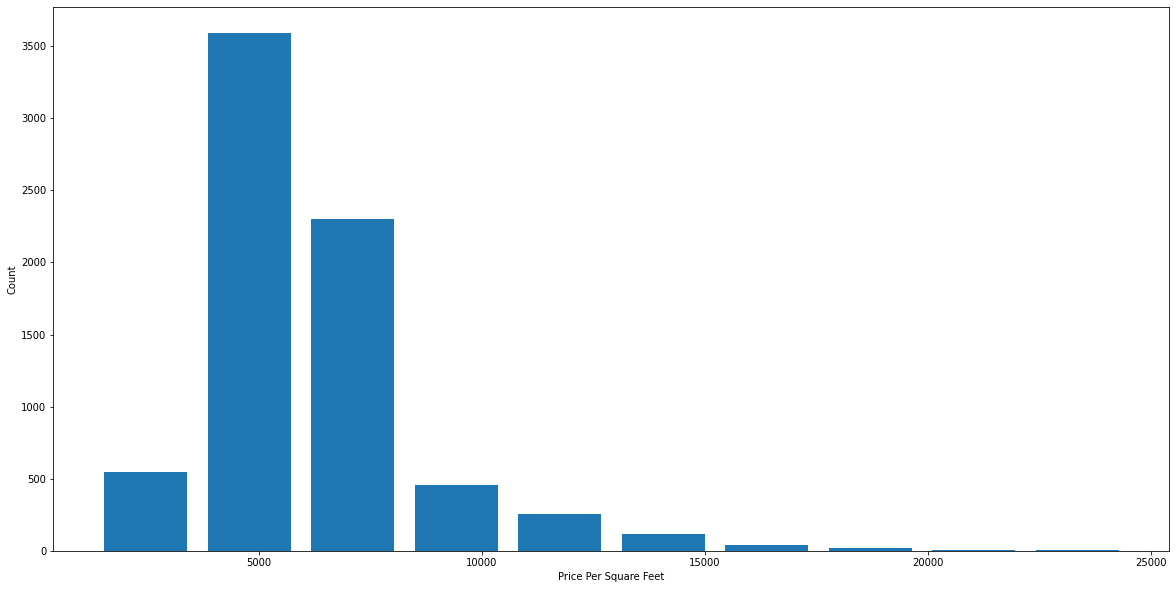

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.Price_Per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Removing bathroom specific outliers.

In [ ]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other Location,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other Location,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other Location,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other Location,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

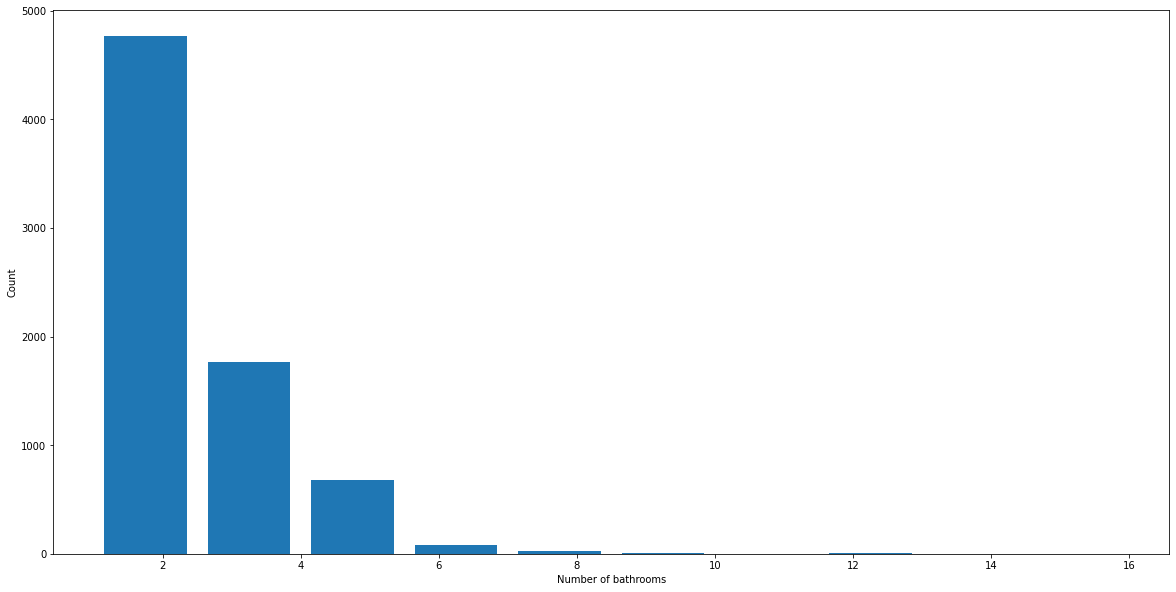

In [ ]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
#Any time we have bathrooms greater than bedroom+2 remove those outliers.
df7[df7.bath>df7.BHK+2]
# Eg. 4Bedrom 7 bathroms... outlier. unusual

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other Location,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [ ]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(7251, 7)

In [ ]:
#Dropping other unnecessary features for model. Remain only with location, total_sqft, bath, price and BHK.
df10 = df8.drop(['size','Price_Per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [ ]:
#Location is a categorical column, need to convert it to a numerical using one hot encoding ---> dummies.
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Getting rid of the dummy variabe trap. Dropping the categorical column for 'Other Location' type.
df11 = pd.concat([df10,dummies.drop('Other Location',axis ='columns')],axis ='columns')
df11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Replaced location by one hot encoding. Now we can drop location column now.
df12 = df11.drop('location',axis= 'columns')
df12.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Checking shape of X.
df12.shape

(7251, 245)

In [ ]:
# X is our independent variables. Price is what we want to predict based on total_sqft, bath and BHK.
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Shape of Independent feature dataframe
X.shape

(7251, 244)

In [ ]:
# y is our dependent variables. Dependent on location, total_sqft, BHK and bath.
y = df12.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [ ]:
# Checking length of y.
len(y)

7251

Training and Testing the Model

In [ ]:
# Splitting our dataset in training and testing dataset using sklearn's train_test_split method.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
# Importing sklearn's Linear Regression model and fitting and training the model. Testing the same model and displaying the score.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8691914452173963

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

 **Identifying the best Model. Comapring Linear Regression, Lasso and DT Regressor.**

In [ ]:
# Best Model Selection using GridSearch CV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear Regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best_score': gs.best_score_,
            'Best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['Model','Best_score','Best_params'])

find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,Model,Best_score,Best_params
0,Linear Regression,0.853373,{'normalize': False}
1,Lasso,0.727562,"{'alpha': 1, 'selection': 'random'}"
2,Decision Tree,0.721363,"{'criterion': 'mse', 'splitter': 'random'}"


In [ ]:
# Predict price function that predicts flat price based on location, sqft, bath and bhk using our model's prediction.
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [ ]:
# Final Dataframe
df12.head(5)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Predicting some flat values - based on location, sqft, BHK and Bathrooms.**

In [ ]:
print(round(predict_price('1st Phase JP Nagar',1000, 2, 2),2),'Lakhs')

82.82 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('1st Phase JP Nagar',2000, 3, 3),2),'Lakhs')

168.11 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('Indira Nagar',2000, 3, 3),2),'Lakhs')

264.66 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('Indira Nagar',2500, 3, 3),2),'Lakhs')

308.15 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('5th Block Hbr Layout',8000, 6, 4),2),'Lakhs')

617.4 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('5th Block Hbr Layout',3500, 4, 3),2),'Lakhs')

226.23 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('Varthur',1600, 3, 2),2),'Lakhs')

91.8 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('Vishveshwarya Layout',2000, 3, 3),2),'Lakhs')

98.39 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('Whitefield',1500, 2, 2),2),'Lakhs')

93.49 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(round(predict_price('6th Phase JP Nagar',1250, 3, 2),2),'Lakhs')

83.92 Lakhs


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**Conclusion**